# Inference for binomial proportion

In [4]:
library(aaltobda)

In [9]:
data("algae")
algae_test <- c(0,1,1,0,0,0)
run_algae <- algae_test

In [14]:
n = length(run_algae)
k = sum(run_algae == 1)

### Background

We are estimating if algae are blue or green by a binomial model.

$\pi$ is the probability of being blue or green, with a prior given by a $\text{Beta}(2,10)$ distribution.

$$
\pi \sim \text{Beta}(2,10) \propto \pi^{2-1}(1-\pi)^{10-1}
$$

Let $y \in \mathcal{Y} = \{0,1\}$ denote if an algae is green or blue. Then the probability of observing blue and or green is given by:

$$
y \sim p(y \mid \pi) = \frac{n!}{k!(n-k)!} \pi^k (1-\pi)^{n-k}
$$

where $n$ denotes the total number of independent Bernoulli trials and $k$ denotes the number of successes (i.e. the number of times we observe $y=1$).

The posterior distribution is easily computed since the Beta and the Binomial are conjugate. Note that:

$$
p(\pi \mid y) \propto  \pi^k (1-\pi)^{n-k} \pi^{2-1}(1-\pi)^{10-1} = \pi^{k+2-1}(1-\pi)^{n-k+10-1}
$$

which means the posterior is a Beta distribution with parameters $\alpha=k+2$ and $\beta=n-k+10$



## a)

In [16]:
## prior parameters
alfa_prior = 2
beta_prior = 10

## posterior parameters
alfa_post = k + alfa_prior
beta_post = n - k + beta_prior

## b)

In [21]:
beta_point_est <- function( prior_alpha , prior_beta, data ){
    
    n = length(data)
    k = sum(data == 1)
    
    alfa_pos = k + prior_alpha
    beta_pos = n - k + prior_beta
    
    pos_mean = alfa_pos / ( alfa_pos + beta_pos )
    
    pos_mean
}

beta_point_est( prior_alpha = 2, prior_beta = 10, data = algae_test )

[1] 0.2222222

In [29]:
beta_interval <- function( prior_alpha, prior_beta, data , prob){
    
    n = length(data)
    k = sum(data == 1)
    
    alfa_pos = k + prior_alpha
    beta_pos = n - k + prior_beta

    post_beta_samples <- rbeta( 1000000, alfa_pos, beta_pos ) 
    
    limit = (1 - prob) / 2.
    
    quantiles = quantile( post_beta_samples, probs = c(0 + limit, 1- limit))
    
    quantiles
    
}


beta_interval( prior_alpha = 2, prior_beta = 10, data = algae_test, prob = 0.9 )

5%        95% 
0.08459134 0.39575601

## c)

In [33]:
beta_low <- function( prior_alpha, prior_beta, data, pi_0 ){
    
    n = length(data)
    k = sum(data == 1)
    
    alfa_pos = k + prior_alpha
    beta_pos = n - k + prior_beta

    pbeta( pi_0, alfa_pos, beta_pos)
     
}

beta_low(prior_alpha = 2, prior_beta = 10, data = algae_test, pi_0 = 0.2)

[1] 0.4511238

## d)

Beyond independence and exchangeability I cannot say too much. The reason of using a Binomial distribution is that the order of how the $n$ trials are seen is not important. We also use this distribution since our data is discrete.



## e)

In [97]:
beta_posterior_params <- function( prior_alpha , prior_beta, data ){
    
    n = length(data)
    k = sum(data == 1)
    
    pos_alpha = k + prior_alpha
    pos_beta  = n - k + prior_beta
    
    c( pos_alpha = pos_alpha, pos_beta = pos_beta )
}

pi_range    = seq( from = -0.01, to = 1.01, by = 0.01 ) # since beta is defined on 0-1

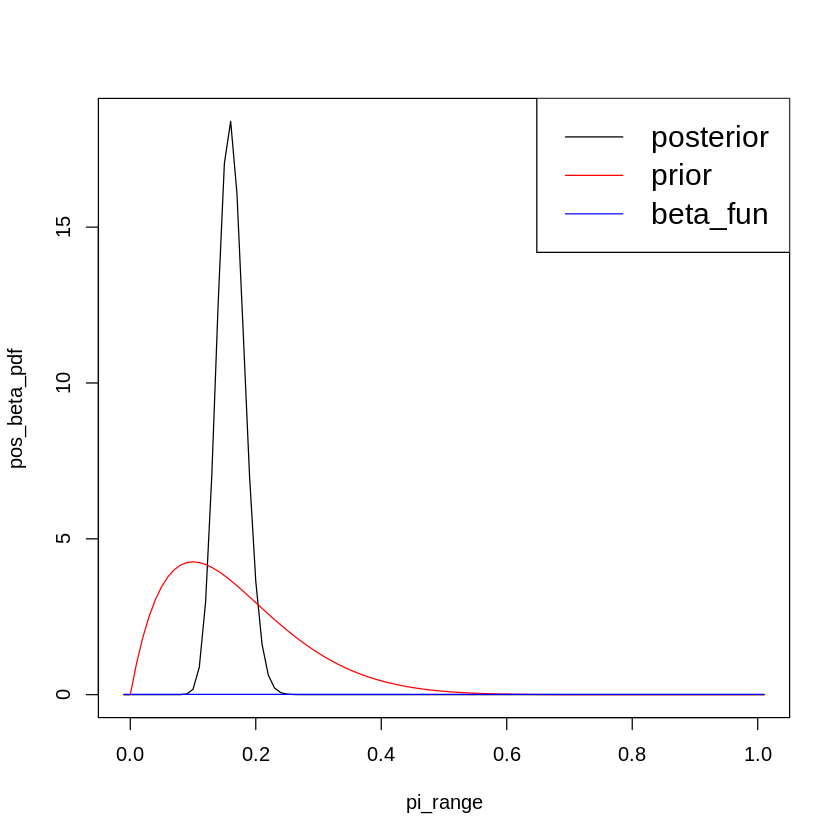

In [98]:
# prior
prior_alpha = 2
prior_beta  = 10
prior_beta_pdf = dbeta( pi_range , prior_alpha, prior_beta)

# posterior
pos_beta_params <- beta_posterior_params( prior_alpha, prior_beta, algae )
pos_alpha    = pos_beta_params['pos_alpha']
pos_beta     = pos_beta_params['pos_beta']
pos_beta_pdf = dbeta( pi_range , alfa, beta )  

# beta prior function (normalization cte)
beta_fun <- beta(prior_alpha, prior_beta)

plot( pi_range, pos_beta_pdf, type = 'l')
lines( pi_range , prior_beta_pdf, type = 'l', col = 'red')
lines(pi_range , rep( beta_fun, length(pi_range) ) , type = 'l', col = 'blue')

# Add a legend
legend( x = 'topright', legend = c("posterior", "prior",'beta_fun'), col = c("black", "red", "blue"), lty = 1, cex = 1.5 )

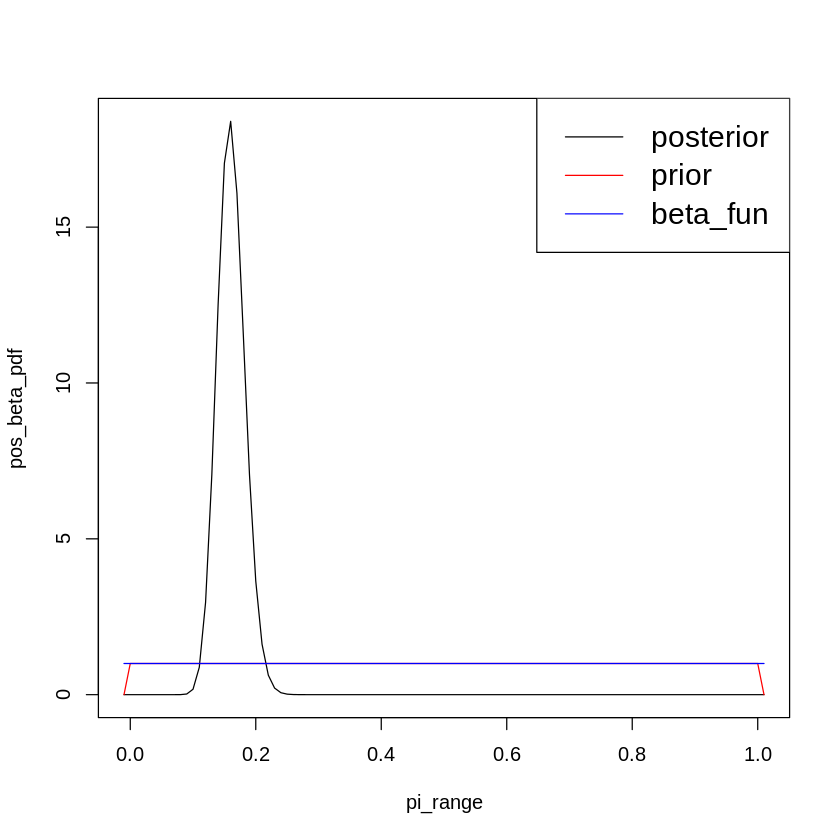

In [99]:
# prior
prior_alpha = 1 # uniform prior
prior_beta  = 1
prior_beta_pdf = dbeta( pi_range , prior_alpha, prior_beta)

# posterior
pos_beta_params <- beta_posterior_params( prior_alpha, prior_beta, algae )
pos_alpha    = pos_beta_params['pos_alpha']
pos_beta     = pos_beta_params['pos_beta']
pos_beta_pdf = dbeta( pi_range , alfa, beta )  

# beta prior function (normalization cte)
beta_fun <- beta(prior_alpha, prior_beta)

plot( pi_range, pos_beta_pdf, type = 'l')
lines( pi_range , prior_beta_pdf, type = 'l', col = 'red')
lines(pi_range , rep( beta_fun, length(pi_range) ) , type = 'l', col = 'blue')

# Add a legend
legend( x = 'topright', legend = c("posterior", "prior",'beta_fun'), col = c("black", "red", "blue"), lty = 1, cex = 1.5 )

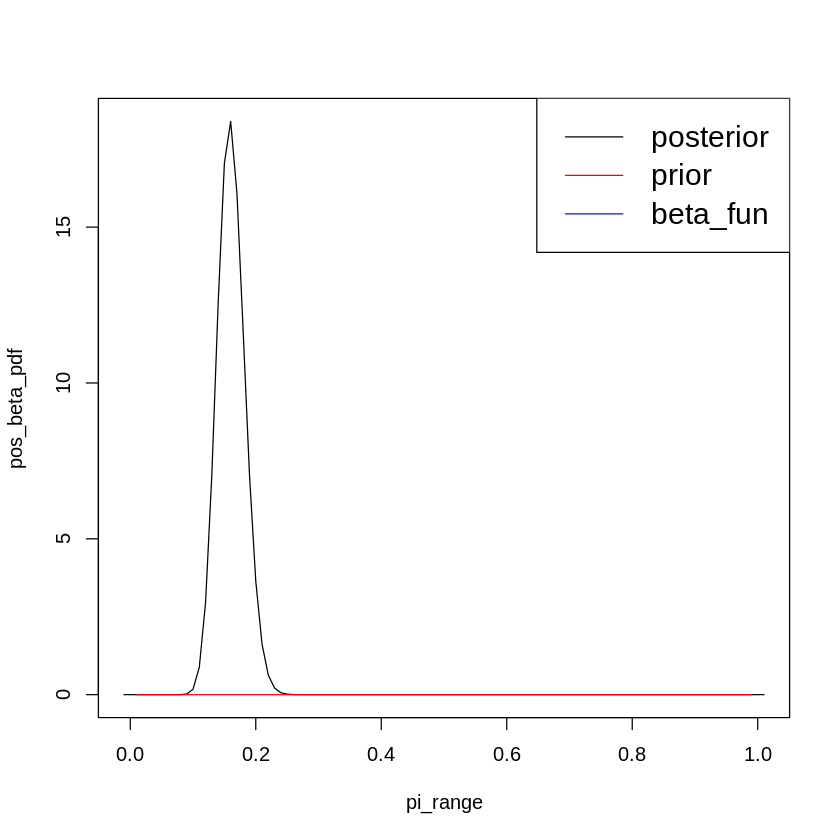

In [101]:
# prior
prior_alpha = 0 # improper prior
prior_beta  = 0
prior_beta_pdf = dbeta( pi_range , prior_alpha, prior_beta)

# posterior
pos_beta_params <- beta_posterior_params( prior_alpha, prior_beta, algae )
pos_alpha    = pos_beta_params['pos_alpha']
pos_beta     = pos_beta_params['pos_beta']
pos_beta_pdf = dbeta( pi_range , alfa, beta )  

# beta prior function (normalization cte)
beta_fun <- beta(prior_alpha, prior_beta)

plot( pi_range, pos_beta_pdf, type = 'l')
lines( pi_range , prior_beta_pdf, type = 'l', col = 'red')
lines(pi_range , rep( beta_fun, length(pi_range) ) , type = 'l', col = 'blue')

# Add a legend
legend( x = 'topright', legend = c("posterior", "prior",'beta_fun'), col = c("black", "red", "blue"), lty = 1, cex = 1.5 )

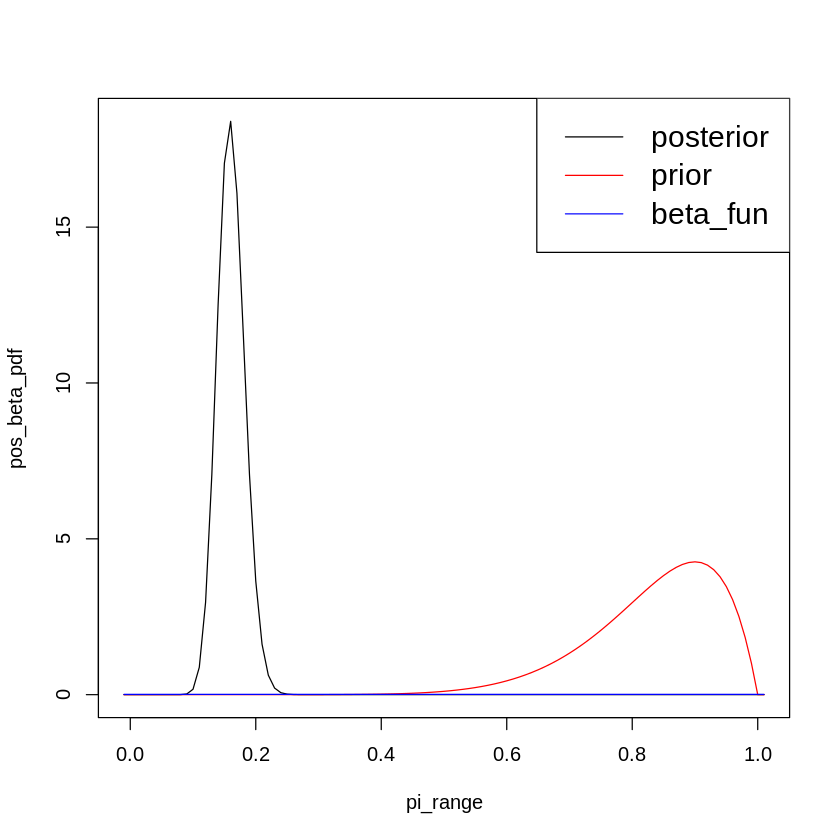

In [105]:
# prior
prior_alpha = 10
prior_beta  = 2
prior_beta_pdf = dbeta( pi_range , prior_alpha, prior_beta)

# posterior
pos_beta_params <- beta_posterior_params( prior_alpha, prior_beta, algae )
pos_alpha    = pos_beta_params['pos_alpha']
pos_beta     = pos_beta_params['pos_beta']
pos_beta_pdf = dbeta( pi_range , alfa, beta )  

# beta prior function (normalization cte)
beta_fun <- beta(prior_alpha, prior_beta)

plot( pi_range, pos_beta_pdf, type = 'l')
lines( pi_range , prior_beta_pdf, type = 'l', col = 'red')
lines(pi_range , rep( beta_fun, length(pi_range) ) , type = 'l', col = 'blue')

# Add a legend
legend( x = 'topright', legend = c("posterior", "prior",'beta_fun'), col = c("black", "red", "blue"), lty = 1, cex = 1.5 )

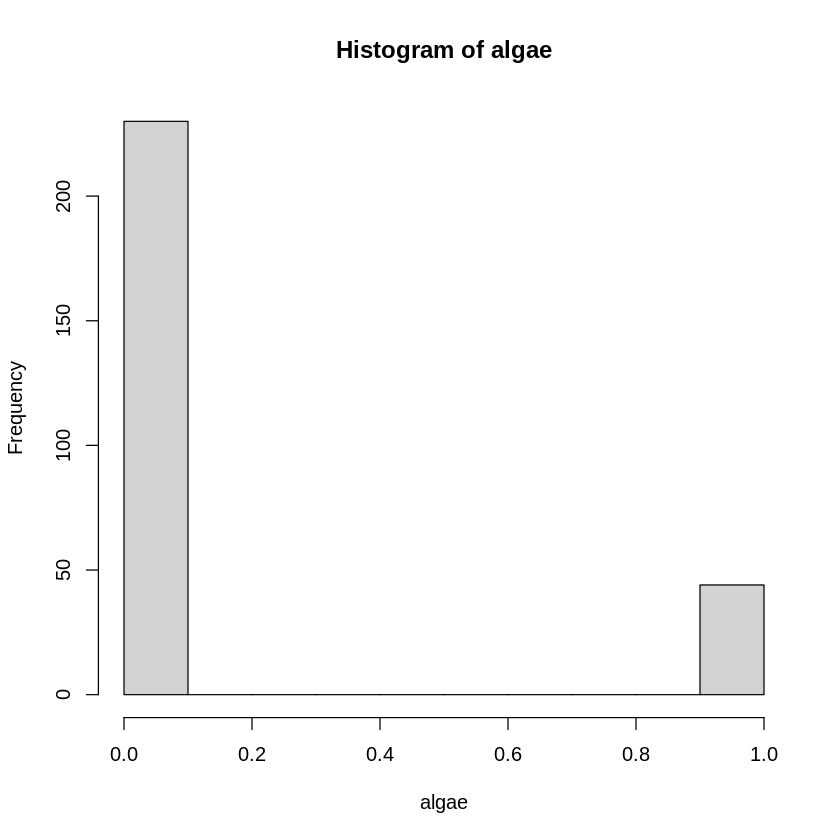

In [106]:
hist(algae)

#### Comment

To stablish a reasonable prior we need to know, more or less, if we know that 1) lakes and rivers have algae and 2) what is the tendency in Finland. If I would say that here in Spain then my prior will be clearly biased towards establishing a prior where $\pi > 0.5$. This is because if we go to Pedriza or to Atazar or to San Juan or any of these wonderful places here in Madrid it is very usual to see algae in the water.

It also depends on which type of algae. We are refering to algaes deep in the lake or those floating? In this case I am thinking in algaes deep in the lake. If I'd say something about algaes floating I would say my prior probability is low. Actually, if we check the histogram of the data we can see that most of the measures are of no algae. Obviously we cannot fix the prior by looking at the data but I have done it to check whether these algaes where seen floating.

Thus a reasonable prior can be the one used in this exercies, $\text{Beta}(2,10)$ since it places most of the probability mass below $0.5$ and is biased towards $0$.

In any case (as seen by the pics I have drawn) we can see that provided we have enough data the prior information vanishes. This is easy to see by taking a look at the posterior:

$$
p(\pi \mid y) \propto  \pi^k (1-\pi)^{n-k} \pi^{\alpha-1}(1-\pi)^{\beta-1} = \pi^{k+\alpha-1}(1-\pi)^{n-k+\beta-1}
$$

so when $n\rightarrow\infty$ the information of the prior completely vanishes (a property of identifiable models).

In [107]:
library(markmyassignment)
assignment_path <-
paste("https://github.com/avehtari/BDA_course_Aalto/",
"blob/master/assignments/tests/assignment2.yml", sep="")
set_assignment(assignment_path)
# To check your code/functions, just run
mark_my_assignment()

Assignment set:
assignment2: Bayesian Data Analysis: Assignment 2
The assignment contain the following (3) tasks:
- beta_point_est
- beta_interval
- beta_low




✔ | F W S  OK | Context
✔ |         5 | beta_point_est()
✔ |         5 | beta_interval() [0.6s]
✔ |         5 | beta_low()

══ Results ════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════
Duration: 0.7 s

[ FAIL 0 | WARN 0 | SKIP 0 | PASS 15 ]
Everything's correct!